<a href="https://colab.research.google.com/github/do04200611/colab/blob/main/professorcode_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 16장 이미지 인식의 꽃, 컨볼루션 신경망(CNN)

## 1. 이미지를 인식하는 원리

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os
import sys

In [ ]:
# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다.
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11490434/11490434 [==============================] - 2s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


In [ ]:
# 학습데이터 60000
print(len(X_train))
print(len(y_train))

60000
60000


In [ ]:
# 테스트 데이터 1000
print(len(X_test))
print(len(y_test))

10000
10000


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
X_train[0].shape

(28, 28)

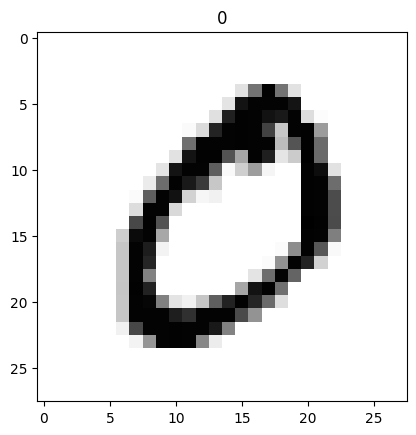

In [ ]:
# 첫 번째 이미지를 확인해 봅시다.
# print(X_train[2].shape)
plt.title(y_train[1])
plt.imshow(X_train[1], cmap='Greys')
plt.show()

In [ ]:
# 이미지가 인식되는 원리를 알아봅시다.
for x in X_train[1]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  51 15925315950 0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  48 2382522522522370  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  54 22725325223923325257 6  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  10 60 22425225325220284 2522531220  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  16325225225225325225296 1892531670  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  51 23825325319011425322847 79 2551680  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  48 23825225217912 75 12121 0  0  25324350 0  0  0  0  0  
0  0  0  0  0  0  0  0  38 16525323320884 0  0  0  0  0  0  25325

In [ ]:
# 차원 변환 과정을 실습해 봅니다.
X_train = X_train.reshape(60000, 784)
print(X_train.shape)

(60000, 784)


In [ ]:
# 차원 변환 과정을 실습해 봅니다.
X_train = X_train.astype('float64')

# 정규화(Normalization)
X_train = X_train / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [ ]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# 클래스 값을 확인해 봅니다.
print(y_train)

[5 0 4 ... 5 6 8]


In [ ]:
# 바이너리화 과정을 실습해 봅니다.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


## 2. 딥러닝 기본 프레임 만들기

In [ ]:
# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
hist = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=1, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/30
210/225 [===========================>..] - ETA: 0s - loss: 0.3514 - accuracy: 0.9035
Epoch 1: val_loss improved from inf to 0.18251, saving model to ./MNIST_MLP.hdf5
225/225 [==============================] - 6s 5ms/step - loss: 0.3419 - accuracy: 0.9061 - val_loss: 0.1825 - val_accuracy: 0.9498
Epoch 2/30
219/225 [============================>.] - ETA: 0s - loss: 0.1468 - accuracy: 0.9582
Epoch 2: val_loss improved from 0.18251 to 0.13012, saving model to ./MNIST_MLP.hdf5
225/225 [==============================] - 1s 4ms/step - loss: 0.1456 - accuracy: 0.9586 - val_loss: 0.1301 - val_accuracy: 0.9619
Epoch 3/30
218/225 [============================>.] - ETA: 0s - loss: 0.0977 - accuracy: 0.9721
Epoch 3: val_loss improved from 0.13012 to 0.11253, saving model to ./MNIST_MLP.hdf5
225/225 [==============================] - 1s 4ms/step - loss: 0.0976 - accuracy: 0.9721 - val_loss: 0.1125 - val_accuracy: 0.9671
Epoch 4/30
213/225 [===========================>..] - ETA: 0s - loss

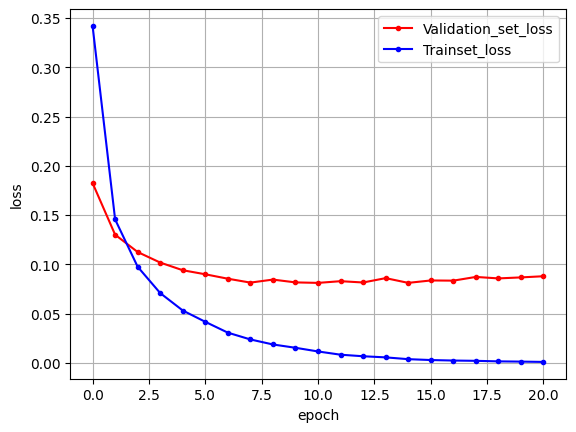

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validation_set_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

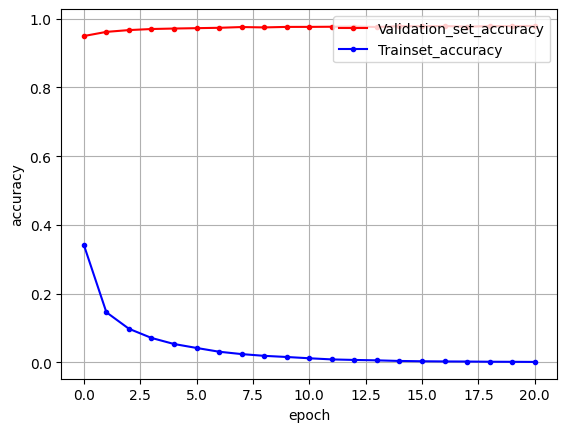

In [ ]:
y_vacc = hist.history['val_accuracy']
y_acc = hist.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vacc, marker='.', c="red", label='Validation_set_accuracy')
plt.plot(x_len, y_acc, marker='.', c="blue", label='Trainset_accuracy')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

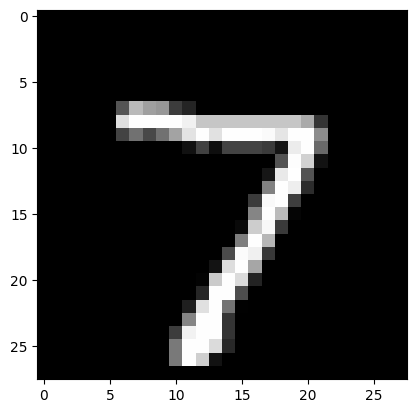

In [ ]:
X_test = X_test.reshape(10000, 28, 28)
plt.imshow(X_test[0], cmap='gray')
plt.show()

## 테스트 데이터로 예측하기

In [ ]:
pred = model.predict(X_test[0].reshape(1,784))
print(pred)

1/1 [==============================] - 0s 105ms/step
[[1.0186635e-10 2.9852397e-12 2.2817144e-08 6.4807250e-06 7.3092760e-15
  6.9619714e-12 1.6922632e-15 9.9999332e-01 4.5806603e-09 5.9533118e-08]]


In [ ]:
# numpy 함수인 argmax는 배열의 값 중 최대값의 인덱스를 반환
print(np.argmax(pred))

7
